In [1]:
import matplotlib.pyplot as plt
from netgraph import Graph
import networkx as nx
from random import randint
import pandas as pd
import numpy as np
from community import community_louvain

In [ ]:
G = nx.Graph()
X = []
Y = []
f = open("../edgeList.txt", "r")

for line in f.readlines():
	a, b = map(int, line[:-1].split())
	G.add_edge(a, b)
	X.append(a)
	Y.append(b)

partition = community_louvain.best_partition(G)

In [4]:
pos = nx.spring_layout(G)
X = []
Y = []
for x in pos:
	X.append(pos[x][0])
	Y.append(pos[x][1])

In [ ]:
G_fb = nx.read_edgelist("../edgeList.txt", create_using= nx.Graph(), nodetype = int)

In [ ]:
print("no of edges =", G_fb.number_of_edges(), "and no of vertices =", G_fb.number_of_nodes())

In [ ]:
X = []
Y = []

with open("../edgeList.txt") as file:
	for line in file:
		# l = line.rstrip()
		x, y = [int(num) for num in line[:-1].split(' ')]
		X.append(x)
		Y.append(y)

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(X, Y, marker='.')
plt.show()

In [15]:
df = pd.read_csv("community.csv")
df_stats = pd.read_csv("community_stats.csv")
df_stats = df_stats.sort_values(by=["population"])
# top_20 = df_stats["community"].to_list()[:20]
bottom_20 = df_stats["community"].to_list()[:]
df = df.loc[df["community"].isin(bottom_20)]

In [16]:
print(bottom_20)

[58, 420, 99, 398, 438, 102, 395, 103, 36, 57, 453, 205, 336, 374, 172, 94, 259, 263, 265, 266, 169, 270, 272, 273, 279, 280, 281, 283, 286, 289, 163, 170, 402, 451, 419, 30, 107, 29, 386, 387, 384, 454, 458, 412, 108, 28, 380, 426, 3, 433, 69, 12, 430, 417, 406, 407, 408, 86, 291, 441, 409, 390, 436, 26, 431, 8, 442, 161, 435, 258, 352, 125, 124, 121, 359, 361, 362, 119, 368, 337, 204, 133, 143, 154, 305, 306, 308, 160, 331, 330, 327, 325, 324, 351, 322, 334, 142, 314, 144, 151, 152, 317, 349, 333, 347, 224, 190, 192, 221, 195, 218, 225, 214, 211, 210, 254, 116, 256, 126, 212, 187, 198, 238, 344, 129, 231, 343, 342, 341, 155, 339, 159, 295, 249, 174, 244, 181, 298, 350, 403, 389, 338, 105, 385, 332, 92, 136, 360, 90, 328, 405, 326, 321, 381, 364, 131, 318, 122, 134, 391, 312, 416, 307, 85, 117, 301, 369, 370, 410, 378, 393, 158, 423, 82, 425, 292, 112, 377, 288, 287, 311, 372, 118, 232, 79, 199, 208, 200, 56, 241, 166, 168, 269, 274, 165, 64, 264, 440, 262, 76, 59, 282, 277, 88, 37, 2

In [17]:
df = df.sort_values(by=["community"])

In [18]:
print(set(df["community"].to_list()))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [19]:
priority = df["author"].to_list()

In [20]:
graph20 = nx.Graph()
G = nx.Graph()
# with open("../edgeList.txt") as file:
# 	for line in file:
# 		# l = line.rstrip()
# 		x, y = [int(num) for num in line[:-1].split(' ')]
# 		X.append(x)
# 		Y.append(y)

# G = nx.Graph()
f = open("../edgeList.txt", "r")
X20 = []
Y20 = []
for line in f.readlines():
	a, b = map(int, line[:-1].split())
	G.add_edge(a, b)
	if a in priority and b in priority:
		graph20.add_edge(a, b)
		X20.append(a)
		Y20.append(b)
f.close()
partition = community_louvain.best_partition(G)

In [21]:
tmp_val = [partition.get(node) for node in graph20.nodes()]
mp = {}
values = []
count = 0
for i in tmp_val:
	if i not in mp:
		mp[i] = count
		count += 1
	values.append(mp[i])
print("values done")
# pos = nx.spring_layout(G)
pos = {}
f = open("position.csv", "r")
for line in f.readlines():
	line = line[:-1].split(",")
	pos[int(line[0])] = list(map(float, line[1:]))
f.close()

values done


In [22]:
# print(pos)

In [23]:
# # pos = nx.spring_layout(G)
# X20 = []
# Y20 = []
# for x in pos:
# 	X20.append(pos[x][0])
# 	Y20.append(pos[x][1])

In [24]:
m = {}
i = 0
for num in priority:
	if num not in m:
		m[num] = i
		i += 1

for num in X20:
	if num not in m:
		m[num] = i
		i += 1

for num in Y20:
	if num not in m:
		m[num] = i
		i += 1

In [25]:
# print(m)
print(i, len(X20),len(Y20))

7015 25674 25674


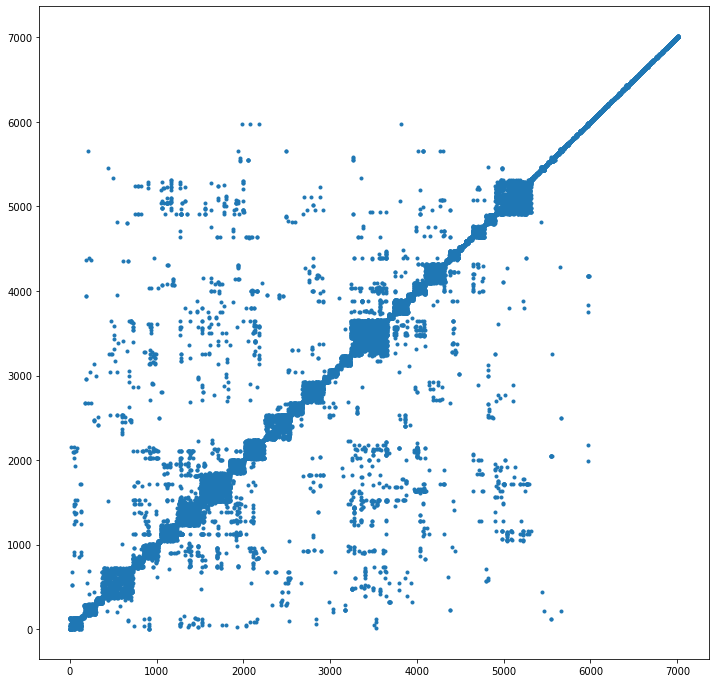

In [26]:
XX = [m[val] for val in X20]
YY = [m[val] for val in Y20]

plt.figure(figsize=(12, 12))
plt.scatter(XX, YY, marker='.')
plt.show()

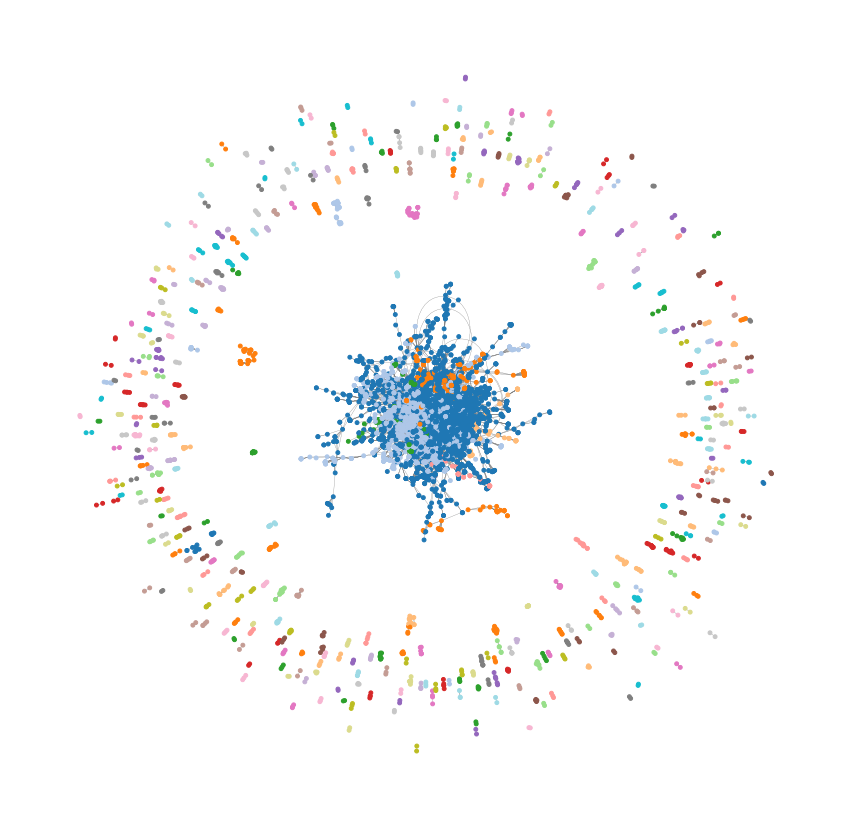

In [27]:
plt.axis("off")
size = 15
plt.rcParams['figure.figsize'] = [size, size]
nx.draw_networkx(graph20, pos = pos, cmap = plt.get_cmap('tab20'), node_color = values, node_size = size, width = 0.3, edge_color = 'grey', with_labels = False)

In [ ]:
# print(values)

In [ ]:

node_color = {node: community_to_color[community_id] for node, community_id in node_to_community.items()}

Graph(g,
      node_color=node_color, node_edge_width=0, edge_alpha=0.1,
      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
)

plt.show()